In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

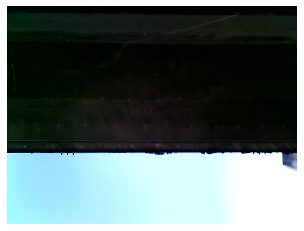

In [116]:
image=cv2.imread("/content/night.jpg")
plt.axis("off")
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

# **그레이스케일 변환**

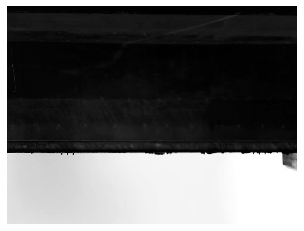

In [117]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.axis("off")
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

# **양방향 필터 이용**
저역통과 필터를 이용하여 노이즈의 제거 시에 상세 정보가 손상되고, 검출되는 에지 위치의 정확성도 영향을 받는다.
양방향 필터는
- 설명추가

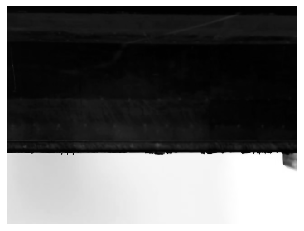

In [118]:
bilateral_img=cv2.bilateralFilter(gray,5,30,30)
plt.axis("off")
plt.imshow(cv2.cvtColor(bilateral_img,cv2.COLOR_BGR2RGB))

# **Adaptive Histogram Equalization**
전체 영상이 아닌 부분 영역에서 이미지 형활화를 시행함. clipLimit는 잡음 증폭을 제한하는 파라미터로 이 값이 작을수록 더 잡음을 제한 함.

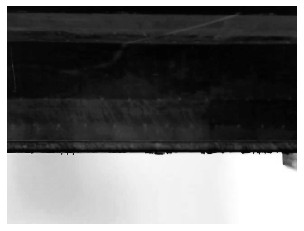

In [119]:
clahe = cv2.createCLAHE(clipLimit=1, tileGridSize=(4,4))
CLAHE_img = clahe.apply(bilateral_img)
plt.axis("off")
plt.imshow(cv2.cvtColor(CLAHE_img, cv2.COLOR_BGR2RGB))

이미지 전체 영역에서 히스토그램이 한쪽으로 치우쳐져 대비가 심하므로 이미지 전체 영역 Equalization을 적용함

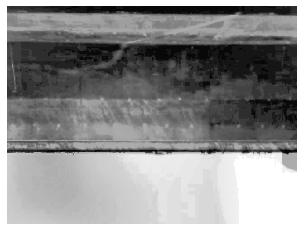

In [120]:

plt.axis("off")
equalize_img = cv2.equalizeHist(CLAHE_img)
plt.imshow(cv2.cvtColor(equalize_img, cv2.COLOR_BGR2RGB))

# Adaptive Histogram Equalization 적용 비교
- (1) 이미지 전체 영역 Equalization만 적용
- (2) Adaptive Histogram Equalization + 이미지 전체 영역 Equalization 적용

Text(0.5, 1.0, '(2)')

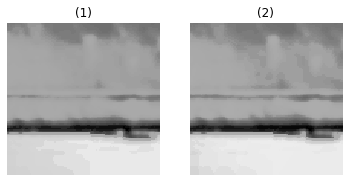

In [121]:
plt.subplot(1,2,1)
plt.axis("off")
equalize_img2 = cv2.equalizeHist(bilateral_img)
dst = equalize_img2.copy() 
roi = equalize_img2[250:350, 250:350]
plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
plt.title("(1)")

plt.subplot(1,2,2)
plt.axis("off")
equalize_img = cv2.equalizeHist(CLAHE_img)
dst = equalize_img.copy() 
roi = equalize_img[250:350, 250:350]
plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
plt.title("(2)")

# **CannyThresh**
 
 이미지의 에지를 검출하기 위해 Canny알고리즘을 이용함. 
 
 임계값은 Otsu의 이진화 방법을 이용하였여 임계값을 구하였음.


In [122]:
CannyAccThresh = cv2.threshold(equalize_img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[0]
CannyAccThresh=(CannyAccThresh+20)
print(CannyAccThresh)

CannyThresh = CannyAccThresh/4*3
edges = cv2.Canny(equalize_img, CannyThresh,CannyAccThresh)

151.0


# **관심영역(Region of Interest,ROI) 지정**

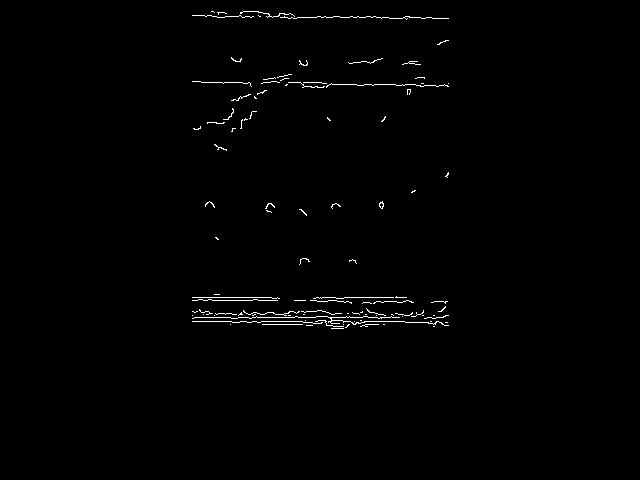

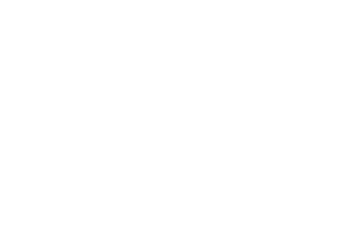

In [123]:
h,w, channel = image.shape
gap=int(w/5)

mask = np.zeros_like(edges)
ignore_mask_color = 255
vertices = np.array([[(int(w/2)-gap,h),(int(w/2)-gap, 0), (int(w/2)+gap,0),(int(w/2)+gap,h)]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)

plt.axis("off")
cv2_imshow(masked_edges)